# Data Normalization

In [29]:
import os

import numpy as np # linear algebra
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [30]:
df_lb = pd.read_csv("src/laptop_price.csv")
df_lb.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


<Axes: xlabel='Price', ylabel='Density'>

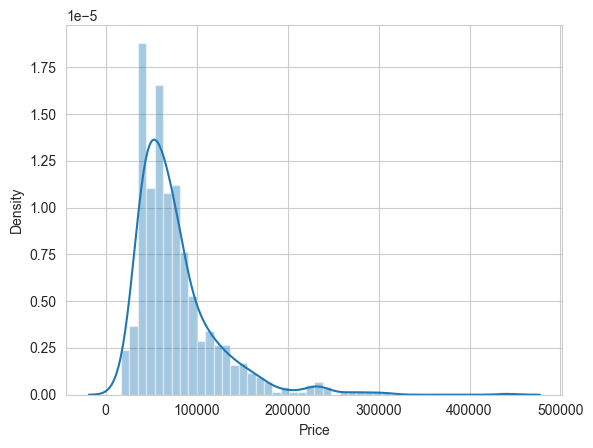

In [31]:
sns.distplot(df_lb["Price"])

## 1. Linear Normalization: Min-Max Normalization (Rescalling)
$$ x' = \frac{x - x_{min}}{x_{max} - x_{min}} $$
Use when you need to set data into the specific boundaries

In [32]:
price_min = np.min(df_lb["Price"])
price_max = np.max(df_lb["Price"])

df_lb["Price Min-Max Norm"] = df_lb["Price"] - price_min
df_lb["Price Min-Max Norm"] = df_lb["Price Min-Max Norm"] / (price_max - price_min)

<Axes: xlabel='Price Min-Max Norm', ylabel='Density'>

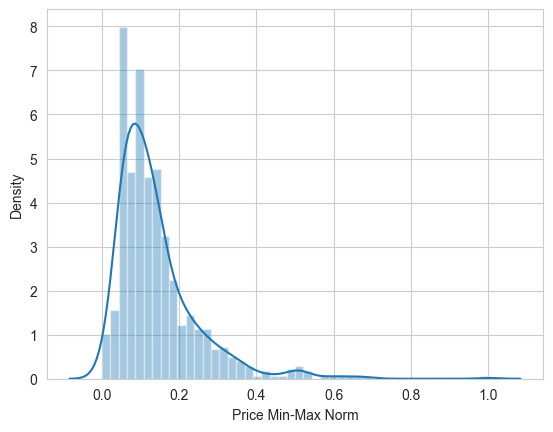

In [33]:
sns.distplot(df_lb["Price Min-Max Norm"])

## 2. Z-score Normalization (Standardization)
$$ x' = \frac{x - mean}{std} $$
Useful Gaussian distribution

In [34]:
price_mean = np.mean(df_lb["Price"])
price_std = np.std(df_lb["Price"])

df_lb["Price Z-Norm"] = df_lb["Price"] - price_mean
df_lb["Price Z-Norm"] = df_lb["Price Z-Norm"] / price_std

<Axes: xlabel='Price Z-Norm', ylabel='Density'>

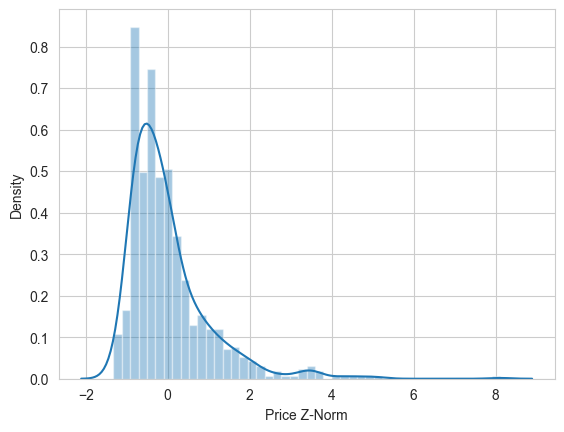

In [35]:
sns.distplot(df_lb["Price Z-Norm"])

## 3. Robust Scaler (analog Min-Max, but considering outliers)

In [36]:
from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()
df_lb["Price Robust_Scaled"] = scaler.fit_transform(df_lb[["Price"]])

<Axes: xlabel='Price Robust_Scaled', ylabel='Density'>

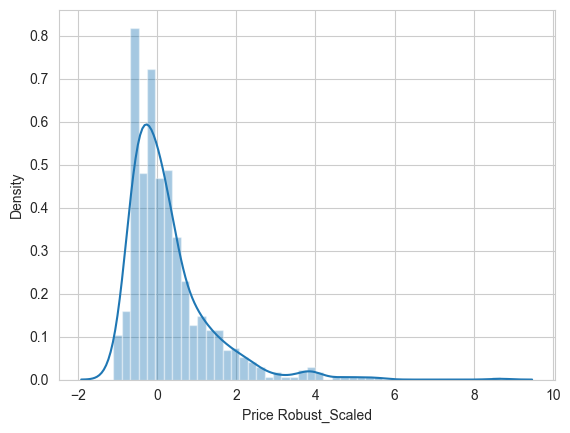

In [37]:
sns.distplot(df_lb["Price Robust_Scaled"])

## 4. Quantile Transformer

In [38]:
from sklearn.preprocessing import QuantileTransformer


# output_distribution: "uniform" & "normal"
transformer = QuantileTransformer(output_distribution="uniform", random_state=0)
df_lb["Price Quantile_Scaled"] = transformer.fit_transform(df_lb[["Price"]])

<Axes: xlabel='Price Quantile_Scaled', ylabel='Density'>

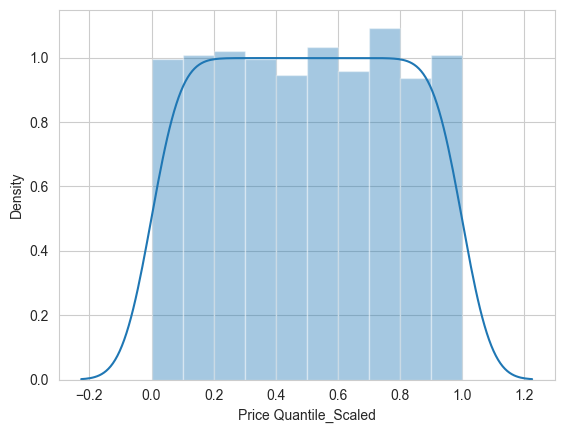

In [39]:
sns.distplot(df_lb["Price Quantile_Scaled"])

<Axes: xlabel='Price Quantile_Scaled', ylabel='Density'>

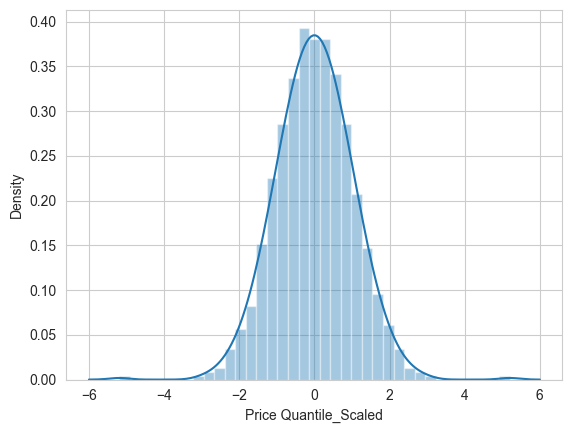

In [40]:
# output_distribution: "uniform" & "normal"
transformer = QuantileTransformer(output_distribution="normal", random_state=0)
df_lb["Price Quantile_Scaled"] = transformer.fit_transform(df_lb[["Price"]])
sns.distplot(df_lb["Price Quantile_Scaled"])

## 5. Logarithmic Scaling
$$ x' = \ln{x} $$

<Axes: xlabel='Price log', ylabel='Density'>

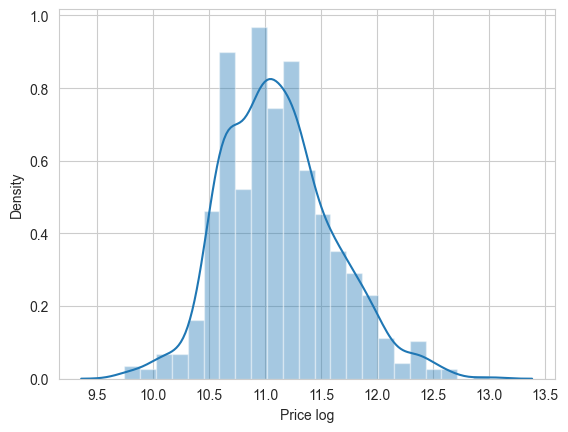

In [41]:
df_lb["Price log"] = np.log(df_lb["Price"])
sns.distplot(df_lb["Price log"])

## 6. Power Transformer (Box-Cox, Yeo-Johnson)

<Axes: xlabel='Price Boxcox_Scaled', ylabel='Density'>

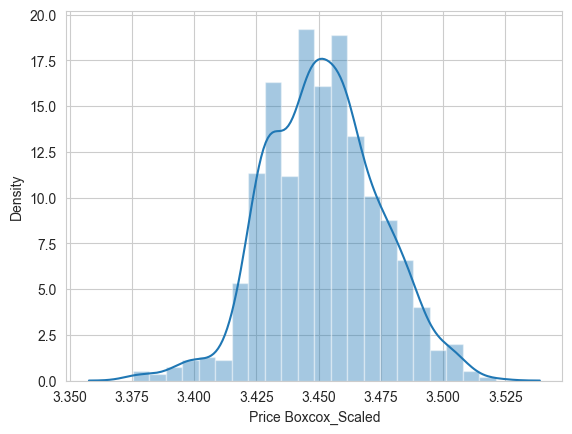

In [42]:
from sklearn.preprocessing import PowerTransformer


# methods: 
transformer = PowerTransformer(method="box-cox", standardize=False)
df_lb["Price Boxcox_Scaled"] = transformer.fit_transform(df_lb[["Price"]])
sns.distplot(df_lb["Price Boxcox_Scaled"])

<Axes: xlabel='Price Yeo-Johnson_Scaled', ylabel='Density'>

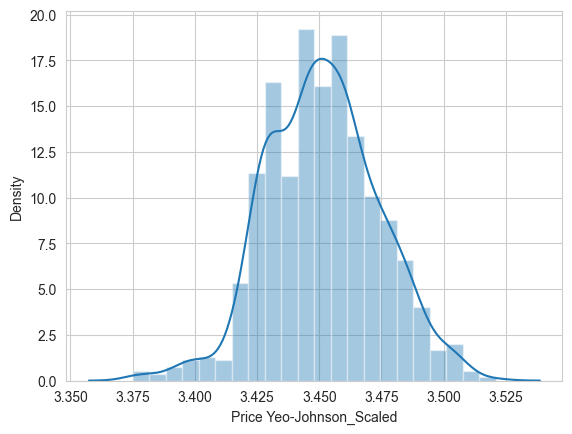

In [43]:
transformer = PowerTransformer(method="yeo-johnson", standardize=False)
df_lb["Price Yeo-Johnson_Scaled"] = transformer.fit_transform(df_lb[["Price"]])
sns.distplot(df_lb["Price Yeo-Johnson_Scaled"])

In [44]:
prices_orig = df_lb["Price"].tolist()
random_indices = np.random.choice(825, 80, replace=False)
for inx in random_indices:
    prices_orig[inx] = -1_000.0 * inx

df_lb["Minus Price"] = prices_orig

<Axes: xlabel='Minus Price', ylabel='Density'>

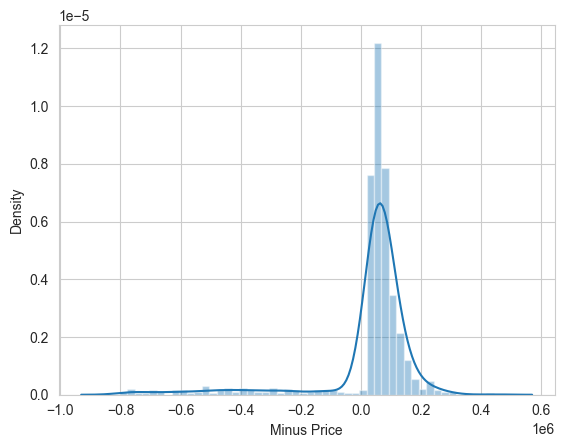

In [45]:
sns.distplot(df_lb["Minus Price"])

In [46]:
# methods: 
transformer = PowerTransformer(method="box-cox", standardize=False)
df_lb["Minus Price Boxcox_Scaled"] = transformer.fit_transform(df_lb[["Minus Price"]])
sns.distplot(df_lb["Minus Price Boxcox_Scaled Boxcox_Scaled"])

ValueError: The Box-Cox transformation can only be applied to strictly positive data

<Axes: xlabel='Minus Price YJ_Scaled', ylabel='Density'>

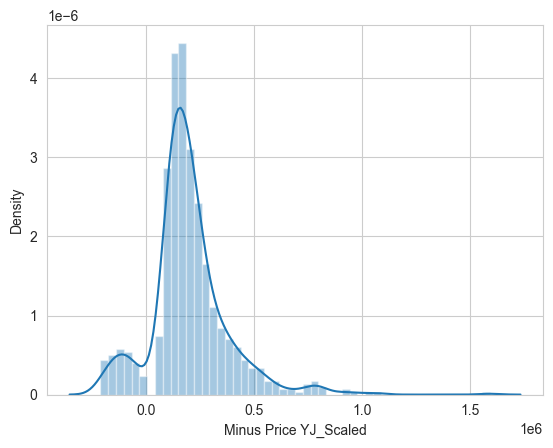

In [47]:
# methods: 
transformer = PowerTransformer(method="yeo-johnson", standardize=False)
df_lb["Minus Price YJ_Scaled"] = transformer.fit_transform(df_lb[["Minus Price"]])
sns.distplot(df_lb["Minus Price YJ_Scaled"])